In [634]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import calendar
import sqlite3 as sql
import math
import geopandas as gpd
from matplotlib.ticker import MultipleLocator

In [397]:
path = 'netflix_titles.csv'
df = pd.read_csv(path, sep = ',')

display(df.nunique().to_frame().T.set_index(pd.Index(['Valores Únicos'])))
display(df.isnull().sum().to_frame().T.set_index(pd.Index(['Valores Faltantes'])))
display(df[df.duplicated(keep='first', subset='show_id')])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
Valores Únicos,8807,2,8807,4528,7692,748,1767,74,17,220,514,8775


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
Valores Faltantes,0,0,0,2634,825,831,10,0,4,3,0,0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [398]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


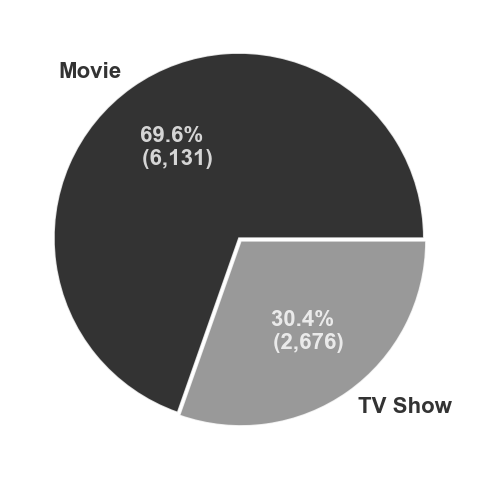

In [399]:
# Pie chart

sns.set_theme()

df.type.value_counts()
fig,ax = plt.subplots(figsize = (6,6))

patches, texts,autotexts = ax.pie (df.type.value_counts(), 
        labels = df.type.value_counts().index, 
        autopct=lambda pct : '{:.1f}% \n ({:,.0f})'.format(pct,pct * sum(df['type'].value_counts())/100),
        textprops= {'color': 'white', 'weight': 'bold', 'size': '16', 'alpha': 0.8},
        colors = ['black', 'gray'], 
        wedgeprops = {'alpha': 0.8}, 
        explode=(.02, 0)
        )

for text in texts:
    text.set_color('black')

In [400]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [401]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month'] = [calendar.month_name[int(date.month)] for date in df['date_added']]
df['year'] = [date.year for date in df['date_added']]
df['month'] = pd.Categorical(df['month'], categories=list(calendar.month_name), ordered=True)

In [402]:
conn = sql.connect('nt.db')
df.to_sql(name = 'nt', con=conn, if_exists='replace')

8807

Text(0.5, 1.0, 'Cantidad de títulos agregados a Netflix')

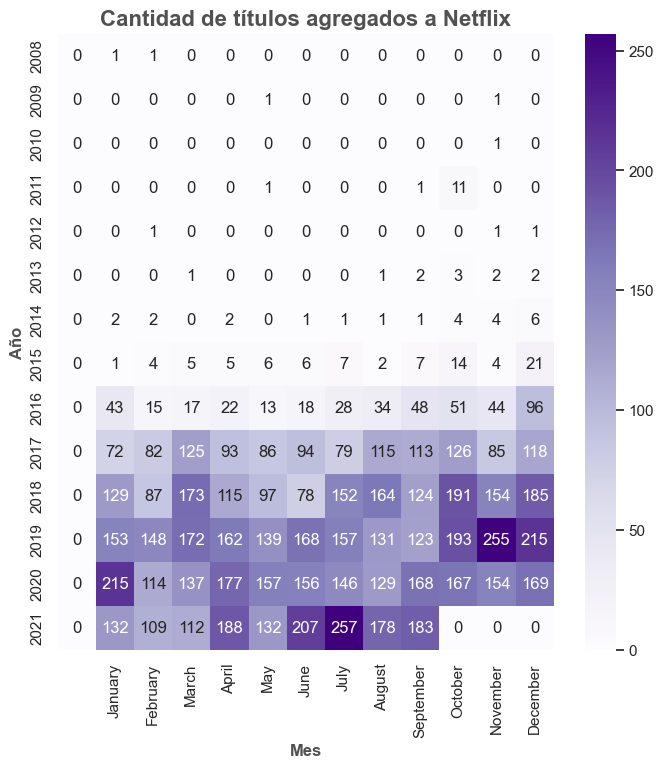

In [403]:
fig,ax = plt.subplots(figsize = (8,8))
pivot_table = pd.pivot_table(df, index='year', columns='month', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Purples')

ax.set_xlabel('Mes', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel('Año', fontsize = 12, fontweight = 'bold', alpha = 0.8)

ax.set_title('Cantidad de títulos agregados a Netflix', fontsize = 16, fontweight = 'bold', alpha = 0.8)


Text(0.5, 0.975, 'Cantidad de títulos agregados a Netflix')

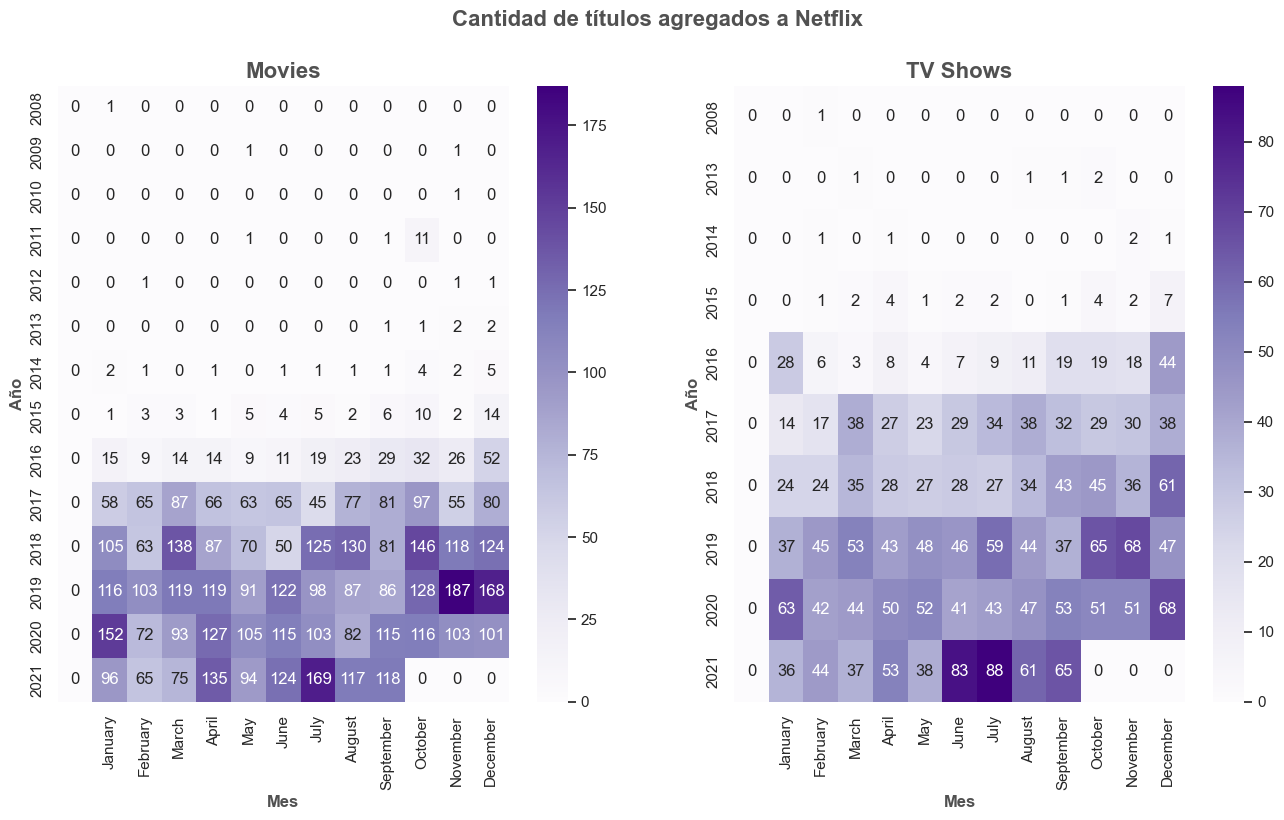

In [404]:
fig,ax = plt.subplots(ncols=2, figsize = (16,8))

pivot_table = pd.pivot_table(df[df['type'] == 'Movie'], index='year', columns='month', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, ax=ax[0], annot=True, fmt='d', cmap='Purples')

ax[0].set_xlabel('Mes', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax[0].set_ylabel('Año', fontsize = 12, fontweight = 'bold', alpha = 0.8)

ax[0].set_title('Movies', fontsize = 16, fontweight = 'bold', alpha = 0.8)

pivot_table = pd.pivot_table(df[df['type'] == 'TV Show'], index='year', columns='month', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, ax=ax[1], annot=True, fmt='d', cmap='Purples')

ax[1].set_xlabel('Mes', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax[1].set_ylabel('Año', fontsize = 12, fontweight = 'bold', alpha = 0.8)

ax[1].set_title('TV Shows', fontsize = 16, fontweight = 'bold', alpha = 0.8)

fig.suptitle('Cantidad de títulos agregados a Netflix', fontsize = 16, fontweight = 'bold', alpha = 0.8, y = 0.975)


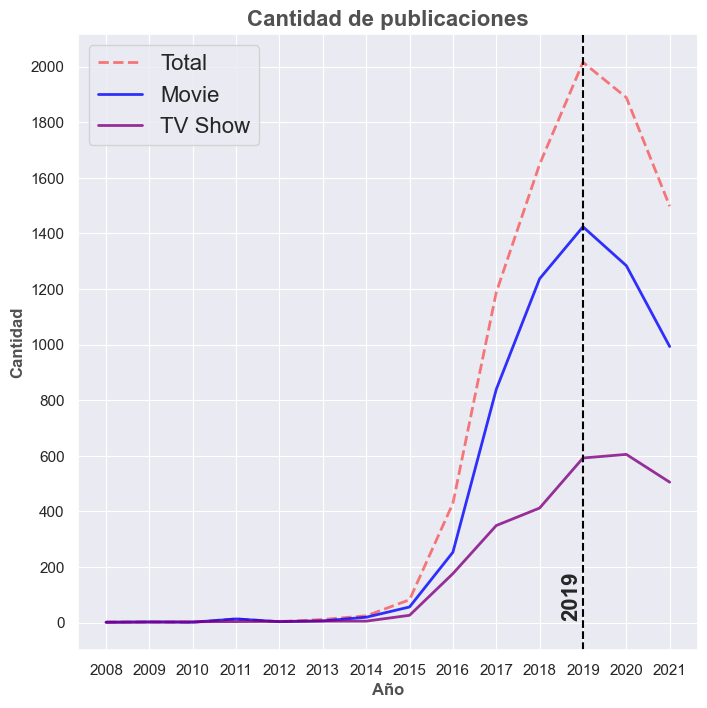

In [814]:
fig,ax = plt.subplots(figsize =(8,8))
colors = ['blue', 'purple']

x = df['year'].value_counts().index
y = df['year'].value_counts().values
sns.lineplot(x = x, y = y, label = 'Total', color = 'red', alpha = 0.5, linewidth = 2, linestyle = 'dashed')

i = 0
for tipo in df['type'].unique():
    df_type = df[df['type'] == tipo]
    x = df_type['year'].value_counts().index
    y = df_type['year'].value_counts().values

    sns.lineplot(x = x, y = y, label = tipo, color = colors[i], alpha = 0.8, linewidth = 2)
    i += 1

dict_years = dict(df['year'].value_counts())
max_val = df['year'].value_counts().max()

for key,val in dict_years.items():
    if val == max_val:
        max_year = key

ax.axvline(x = max_year, color = 'black', ls = '--', lw = 1.5)
plt.text(x = max_year-0.5, y = 20, s = str(max_year), fontweight = 'bold', rotation = 90, fontsize = 16)

ax.legend(loc = 'upper left', fontsize = 16)
ax.set_xlabel('Año', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel('Cantidad', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_title('Cantidad de publicaciones', fontsize = 16, fontweight = 'bold', alpha = 0.8)
ax.grid(lw = 0.8)
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.xaxis.set_major_locator(MultipleLocator(1))

In [561]:
df['duration_int'] = (df['duration'].apply(lambda x: x.split(' ')[0] if type(x) == str else x)).astype(dtype='int',errors='ignore')

df.shape

(8807, 15)

In [539]:
genres = {}
for genre in df[df['type'] == 'Movie']['listed_in']:
    for subgenre in genre.split(','):
        subgenre = subgenre.strip()
        if subgenre not in genres:
            genres[subgenre] =1
        else:
            genres[subgenre] += 1

genres

{'Documentaries': 869,
 'Children & Family Movies': 641,
 'Dramas': 2427,
 'Independent Movies': 756,
 'International Movies': 2752,
 'Comedies': 1674,
 'Thrillers': 577,
 'Romantic Movies': 616,
 'Music & Musicals': 375,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 243,
 'Action & Adventure': 859,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Sports Movies': 219,
 'Cult Movies': 71,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'Stand-Up Comedy': 343,
 'Movies': 57}

C:\Users\diego\AppData\Local\Temp\ipykernel_12660\39560043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors = 'ignore')
C:\Users\diego\AppData\Local\Temp\ipykernel_12660\39560043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors = 'ignore')
C:\Users\diego\AppData\Local\Temp\ipykernel_12660\39560043.py:10: SettingWithCopyWarning: 
A value is 

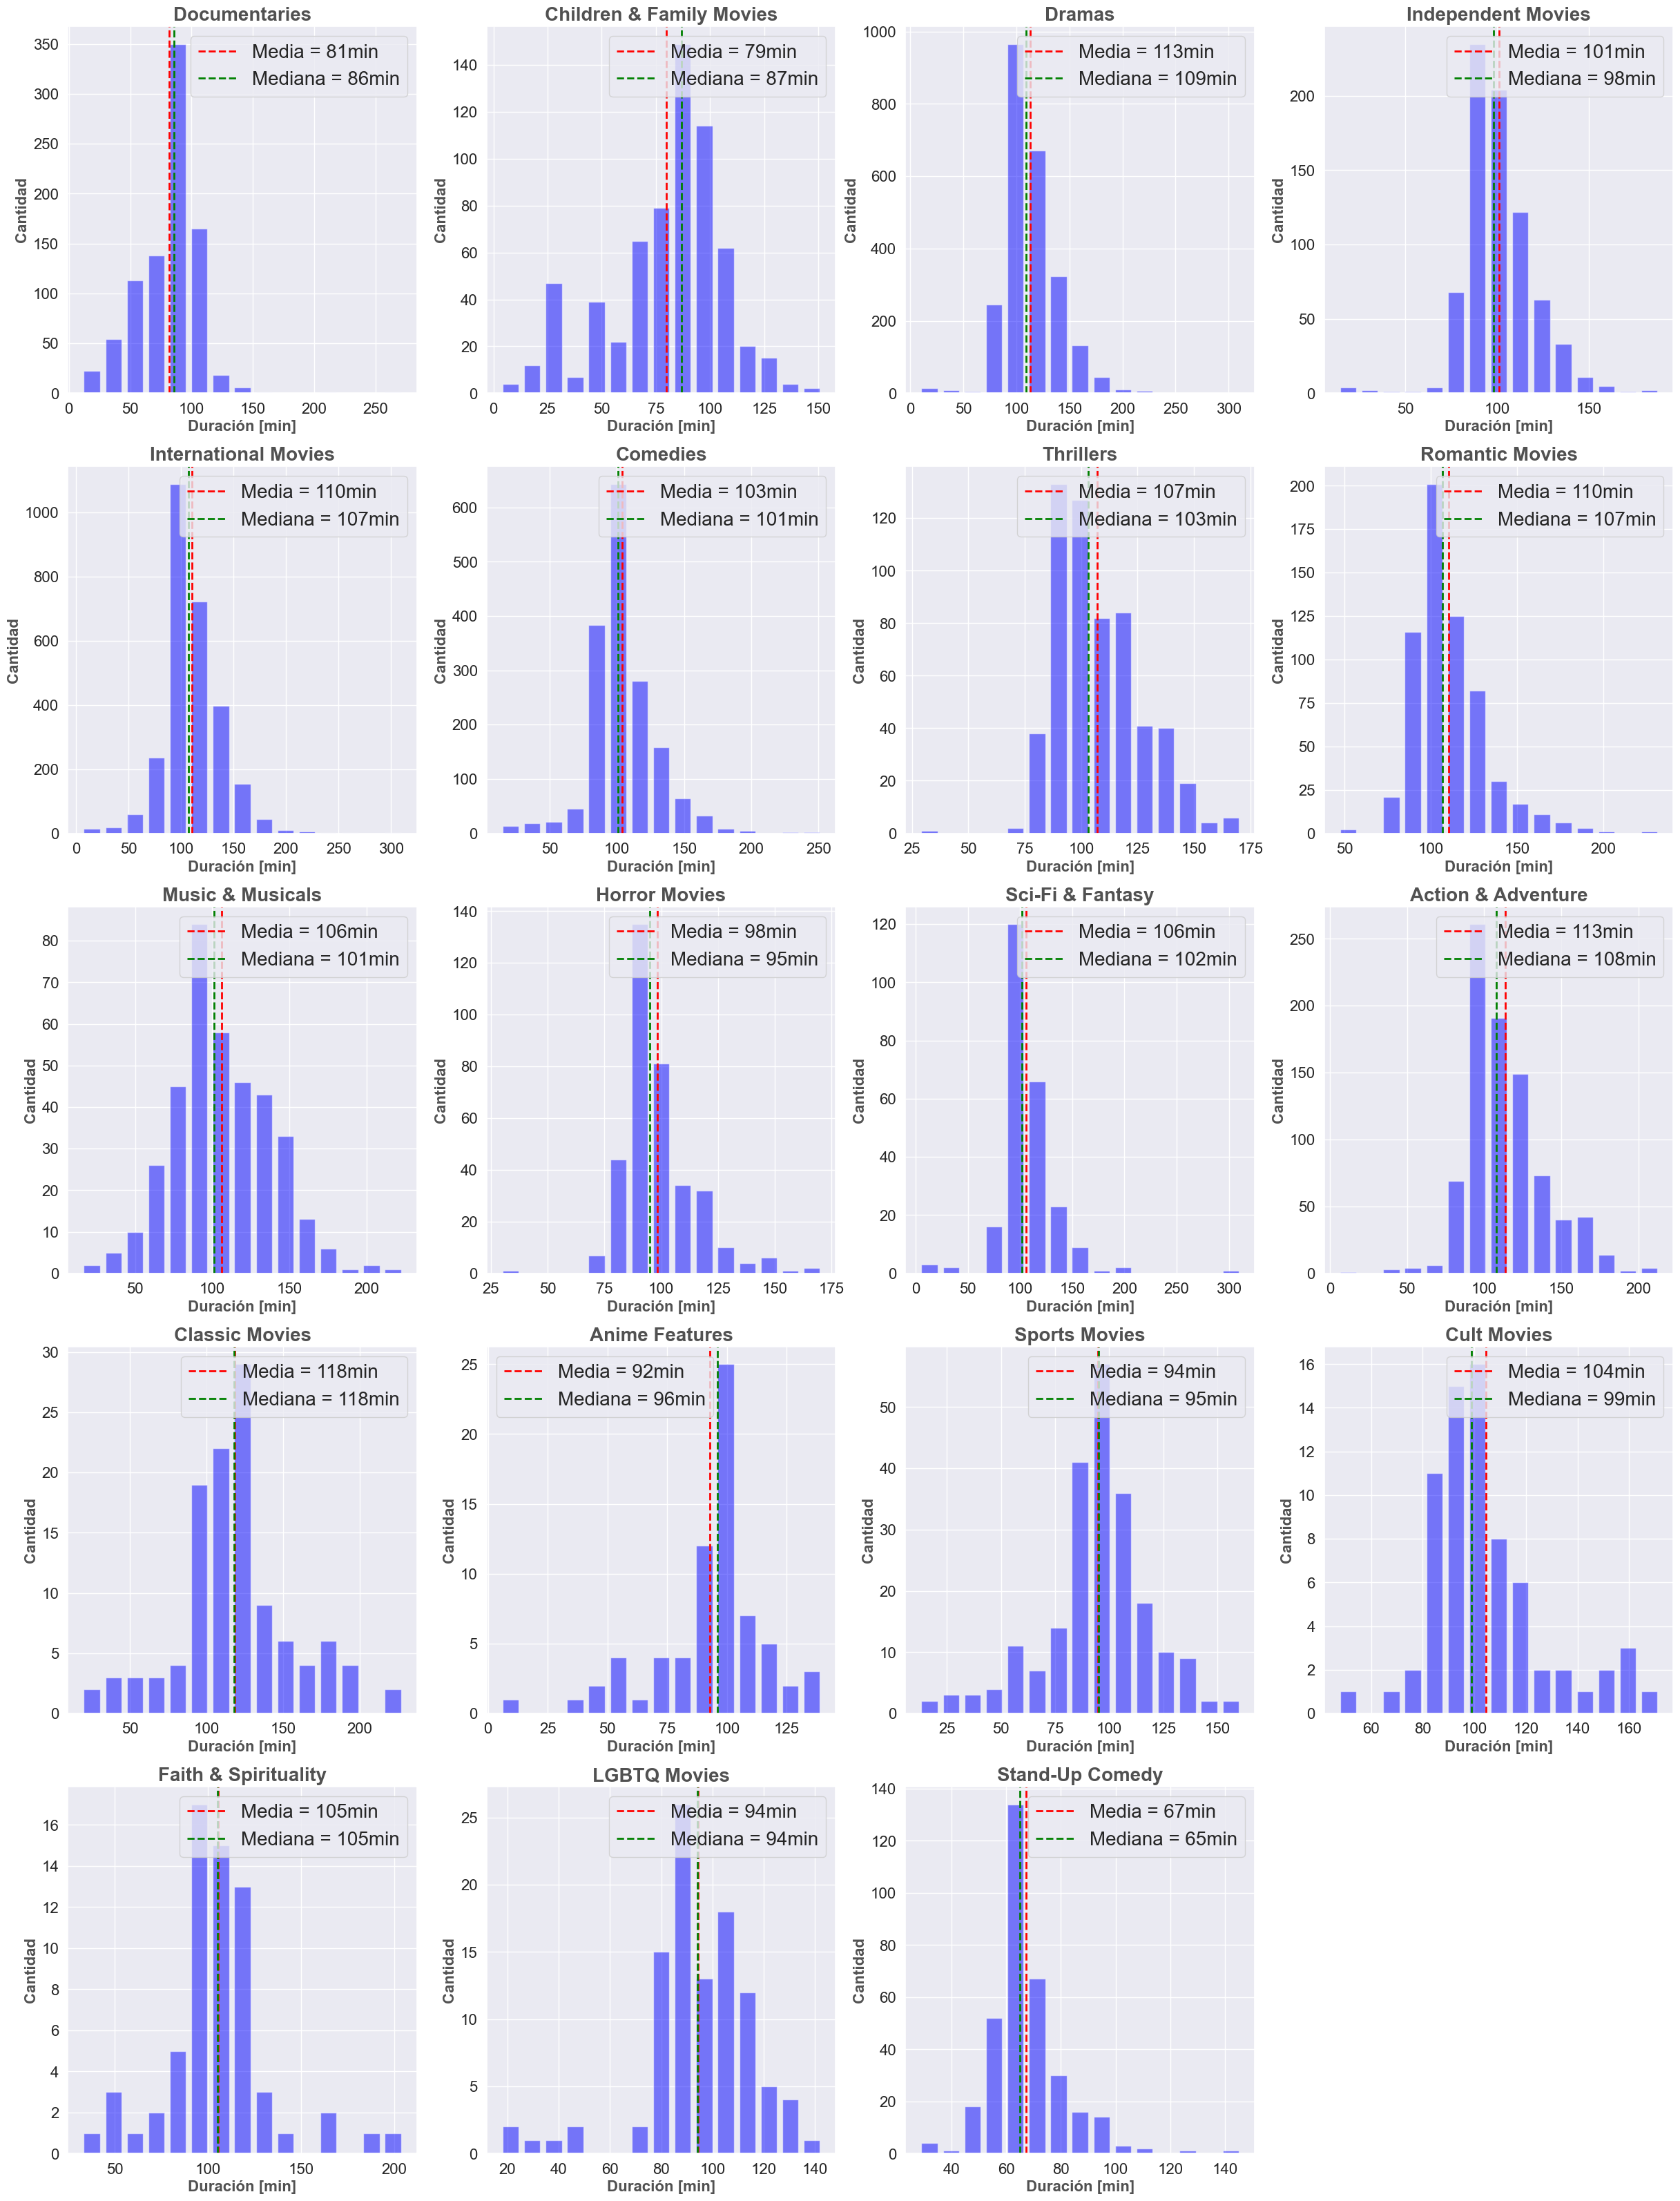

In [563]:
df_titles = list(genres.keys())
df_titles.remove('Movies')
l = len(df_titles)
cols = 4 # max numer of columns
rows = l // cols + 1 if l % cols !=0 else l // cols
fig,ax = plt.subplots(ncols=cols, nrows=rows, figsize = (30,40))
i = 0
for genre in df_titles:
    df_genre = df[(df['listed_in'].str.contains(genre)) & (df['type'] == 'Movie')]
    df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors = 'ignore')
    ax.flat[i].hist(x = df_genre['duration_int'], bins = 15, density = False, rwidth = 0.75, alpha = 0.5, color = 'blue')
    ax.flat[i].tick_params(axis = 'y', labelsize = 16)
    ax.flat[i].set_title(df_titles[i], fontsize = 20, fontweight = 'bold', alpha = 0.8)
    ax.flat[i].axvline(x = df_genre['duration_int'].mean(), color = 'red', ls = '--', lw = 2, label = 'Media = ' + str(math.floor(df_genre['duration_int'].mean())) + 'min')
    ax.flat[i].axvline(x = df_genre['duration_int'].median(), color = 'green', ls = '--', lw = 2, label = 'Mediana = ' + str(math.floor(df_genre['duration_int'].median())) + 'min')
    ax.flat[i].set_xlabel('Duración [min]', fontsize = 16, fontweight = 'bold', alpha = 0.8)
    ax.flat[i].set_ylabel('Cantidad', fontsize = 16, fontweight = 'bold', alpha = 0.8)
    ax.flat[i].tick_params(axis = 'both', labelsize = 16)
    ax.flat[i].legend(loc = 'best', fontsize = 20, markerscale = 4)
    i += 1

for ax in ax.flat:
    if not ax.has_data():
        fig.delaxes(ax)

C:\Users\diego\AppData\Local\Temp\ipykernel_12660\3376132527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors='ignore')


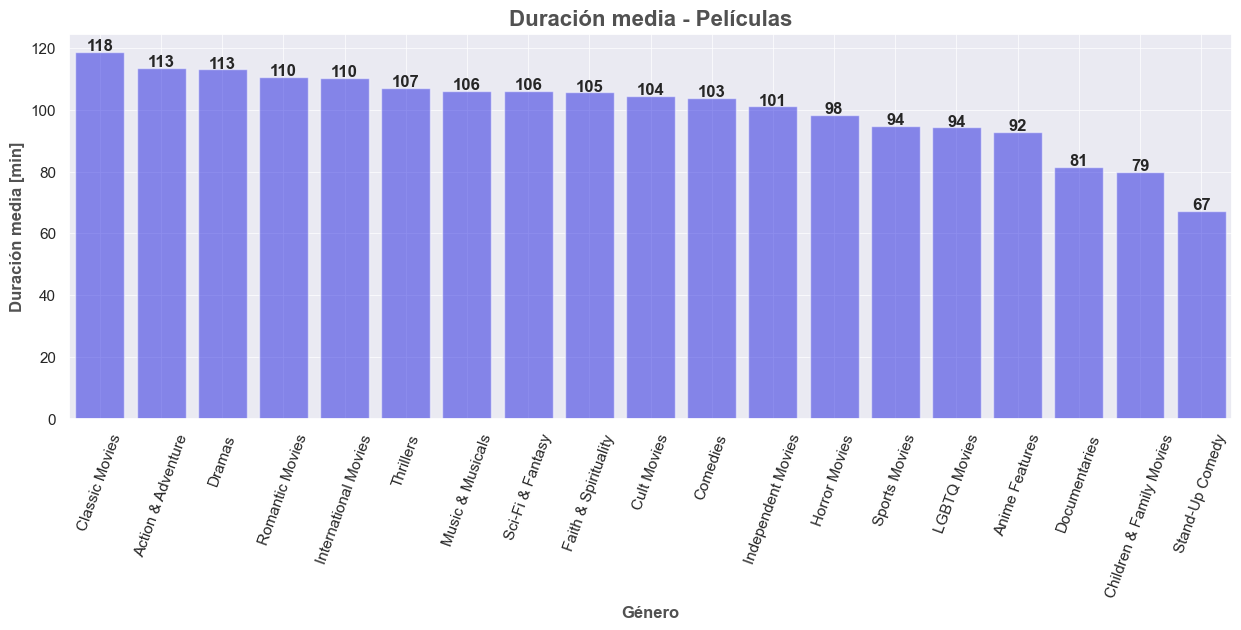

In [564]:
medias = {}
for genre in df_titles:
    df_genre = df[(df['listed_in'].str.contains(genre)) & (df['type'] == 'Movie')]
    df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors='ignore')
    medias[genre] = df_genre['duration_int'].mean()


df_medias = pd.DataFrame.from_dict(medias, orient='index', columns=['Values']).reset_index()
df_medias = df_medias.rename(columns={'index': 'genre', 'Values': 'media'})

fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(data = df_medias.sort_values(by = 'media', inplace = True, ascending = False), x = df_medias.genre, y = df_medias.media, color = 'blue', alpha = 0.5)
ax.grid(lw = 0.5)

for i in range(l):
    plt.text(x=i, y=df_medias.iloc[i]['media'] + 0.40, s=str(math.floor(df_medias.iloc[i]['media'])), ha='center', fontweight = 'bold')

ax.set_xlabel ('Género', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel ('Duración media [min]', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_title ('Duración media - Películas', fontsize = 16, fontweight = 'bold', alpha = 0.8)
ax.tick_params (axis='x', rotation = 70)

In [565]:
genres_shows = {}
for genre in df[df['type'] == 'TV Show']['listed_in']:
    for subgenre in genre.split(','):
        subgenre = subgenre.strip()
        if subgenre not in genres_shows:
            genres_shows[subgenre] =1
        else:
            genres_shows[subgenre] += 1

genres_shows

{'International TV Shows': 1351,
 'TV Dramas': 763,
 'TV Mysteries': 98,
 'Crime TV Shows': 470,
 'TV Action & Adventure': 168,
 'Docuseries': 395,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'TV Comedies': 581,
 'TV Horror': 75,
 'British TV Shows': 253,
 'Spanish-Language TV Shows': 174,
 'TV Thrillers': 57,
 "Kids' TV": 451,
 'TV Sci-Fi & Fantasy': 84,
 'Anime Series': 176,
 'Korean TV Shows': 151,
 'Science & Nature TV': 92,
 'Teen TV Shows': 69,
 'TV Shows': 16,
 'Stand-Up Comedy & Talk Shows': 56,
 'Classic & Cult TV': 28}

C:\Users\diego\AppData\Local\Temp\ipykernel_12660\709718145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors = 'ignore')
C:\Users\diego\AppData\Local\Temp\ipykernel_12660\709718145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors = 'ignore')
C:\Users\diego\AppData\Local\Temp\ipykernel_12660\709718145.py:9: SettingWithCopyWarning: 
A value is 

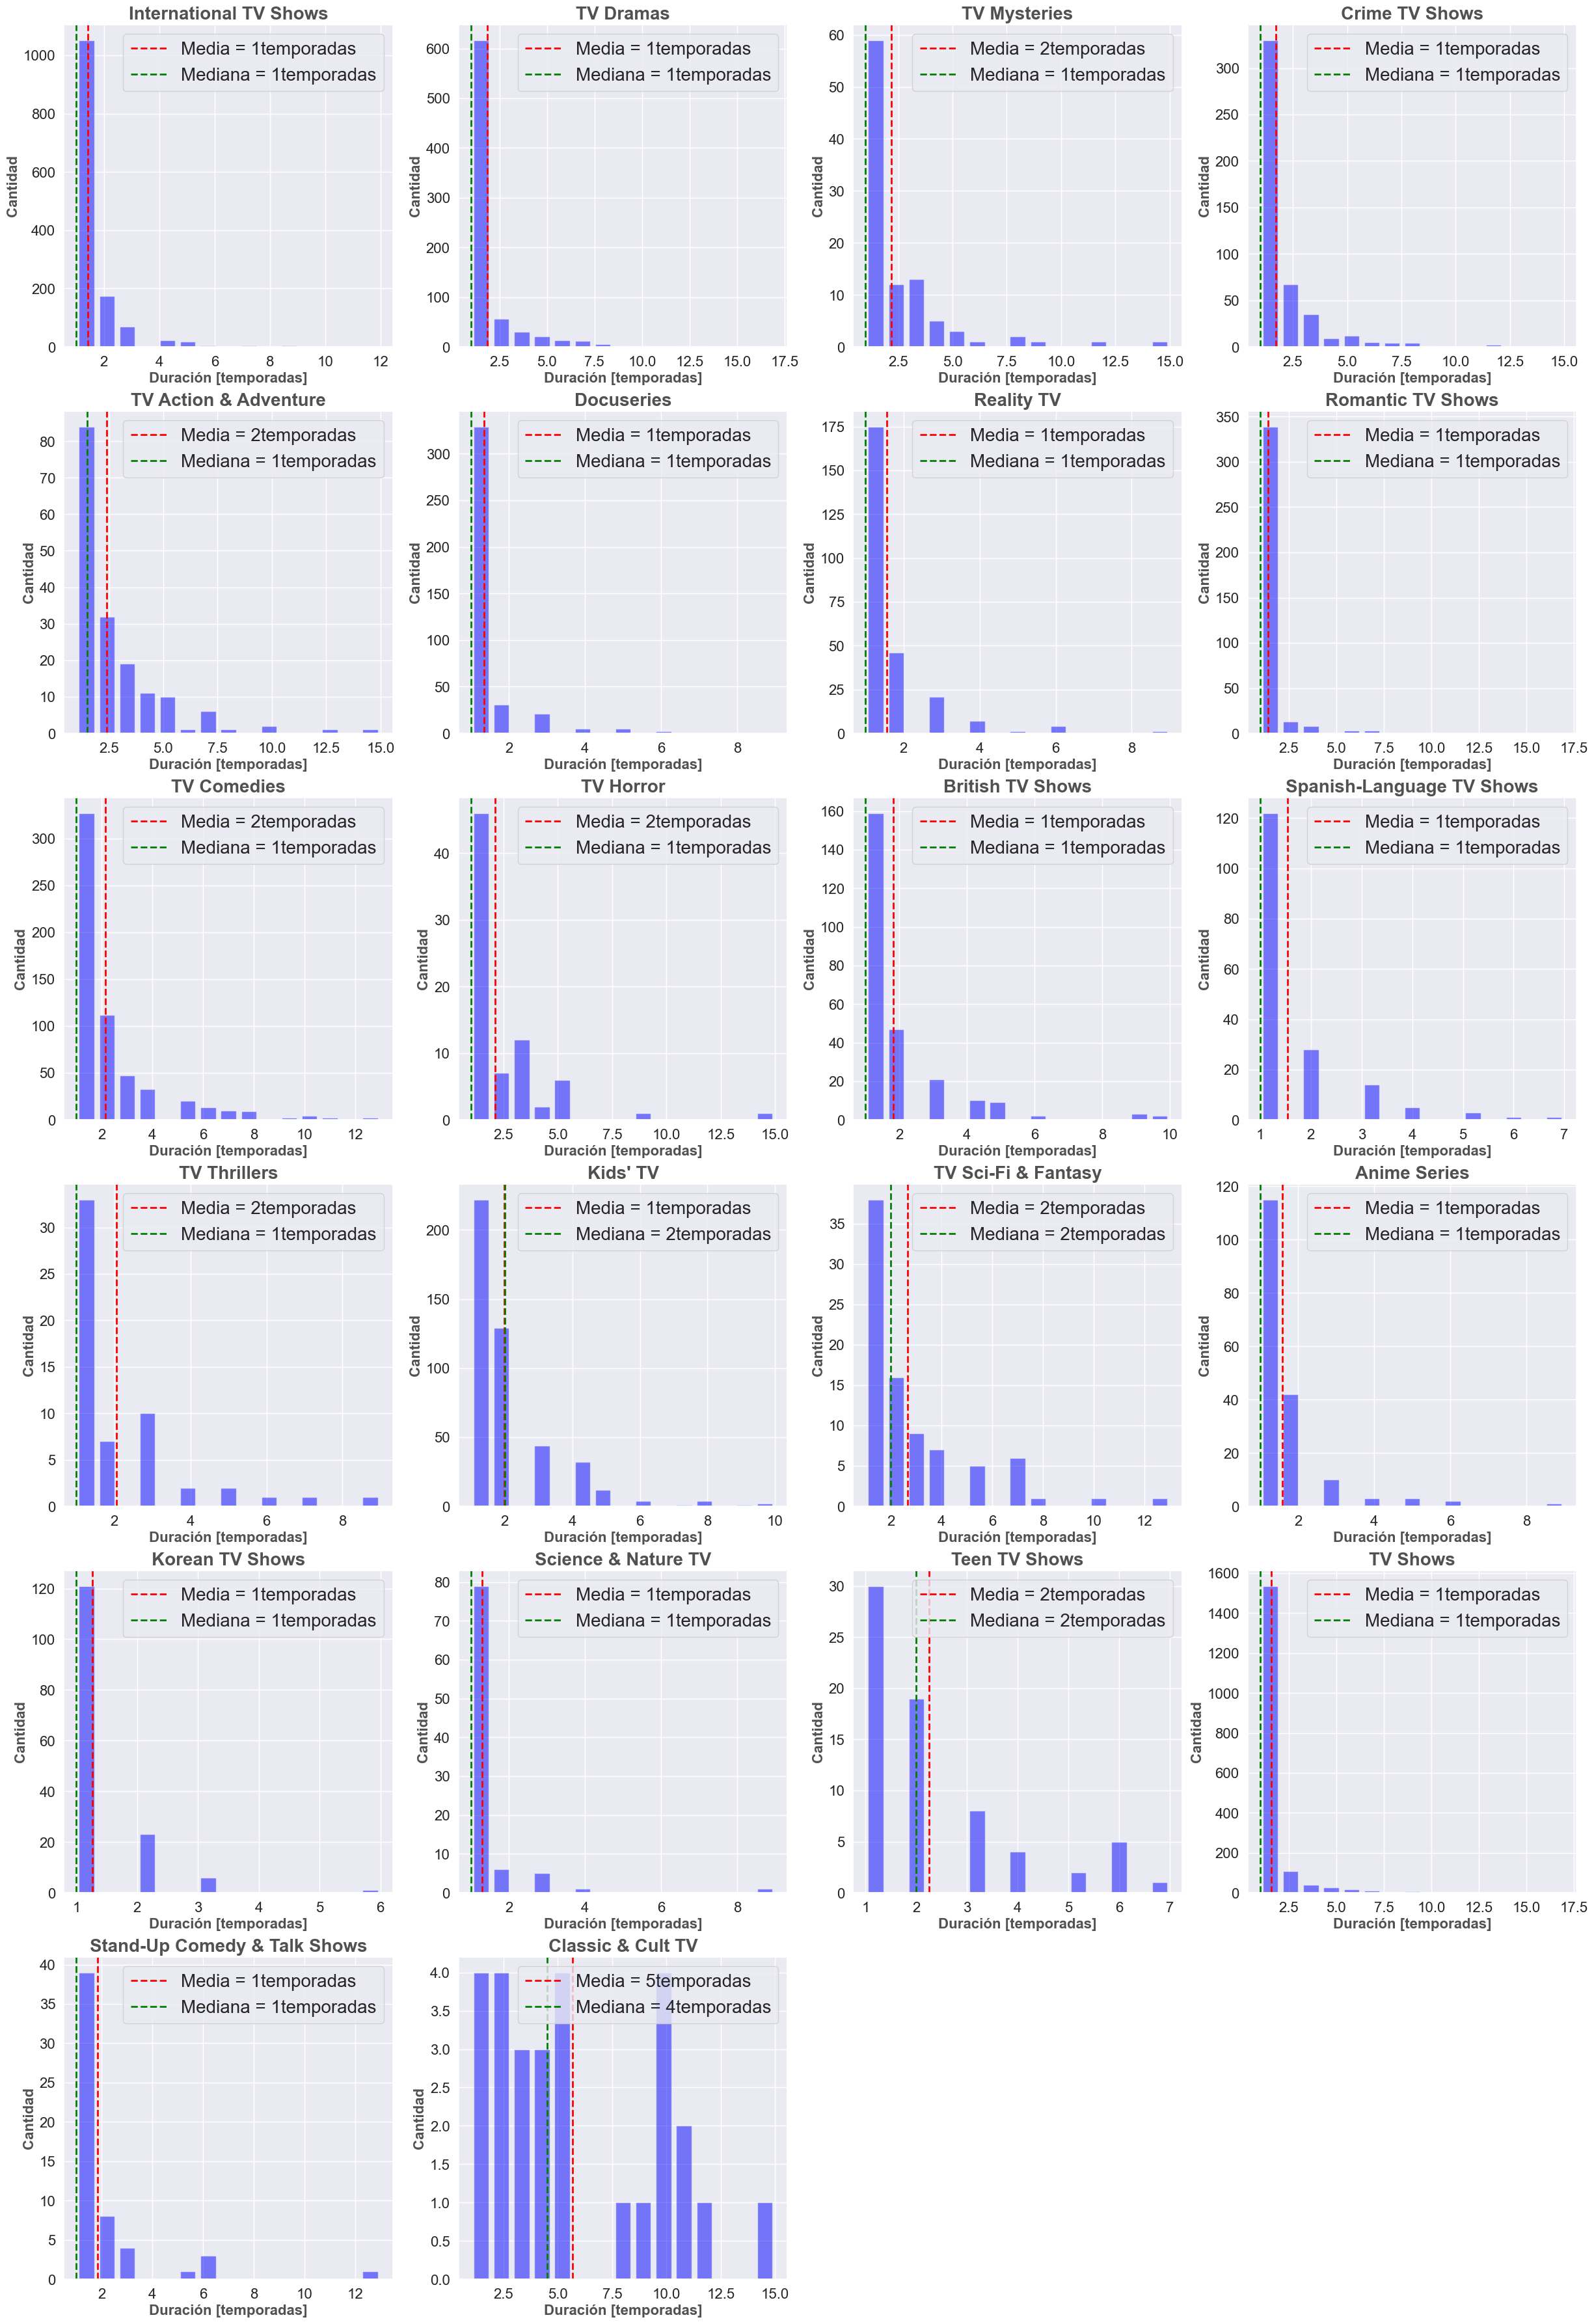

In [567]:
df_titles = list(genres_shows.keys())
l = len(df_titles)
cols = 4 # max numer of columns
rows = l // cols + 1 if l % cols !=0 else l // cols
fig,ax = plt.subplots(ncols=cols, nrows=rows, figsize = (30,45))
i = 0
for genre in df_titles:
    df_genre = df[(df['listed_in'].str.contains(genre)) & (df['type'] == 'TV Show')]
    df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors = 'ignore')
    ax.flat[i].hist(x = df_genre['duration_int'], bins = 15, density = False, rwidth = 0.75, alpha = 0.5, color = 'blue')
    ax.flat[i].tick_params(axis = 'y', labelsize = 16)
    ax.flat[i].set_title(df_titles[i], fontsize = 20, fontweight = 'bold', alpha = 0.8)
    ax.flat[i].axvline(x = df_genre['duration_int'].mean(), color = 'red', ls = '--', lw = 2, label = 'Media = ' + str(math.floor(df_genre['duration_int'].mean())) + 'temporadas')
    ax.flat[i].axvline(x = df_genre['duration_int'].median(), color = 'green', ls = '--', lw = 2, label = 'Mediana = ' + str(math.floor(df_genre['duration_int'].median())) + 'temporadas')
    ax.flat[i].set_xlabel('Duración [temporadas]', fontsize = 16, fontweight = 'bold', alpha = 0.8)
    ax.flat[i].set_ylabel('Cantidad', fontsize = 16, fontweight = 'bold', alpha = 0.8)
    ax.flat[i].tick_params(axis = 'both', labelsize = 16)
    ax.flat[i].legend(loc = 'best', fontsize = 20, markerscale = 4)
    i += 1

for ax in ax.flat:
    if not ax.has_data():
        fig.delaxes(ax)

C:\Users\diego\AppData\Local\Temp\ipykernel_12660\2239622072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors='ignore')


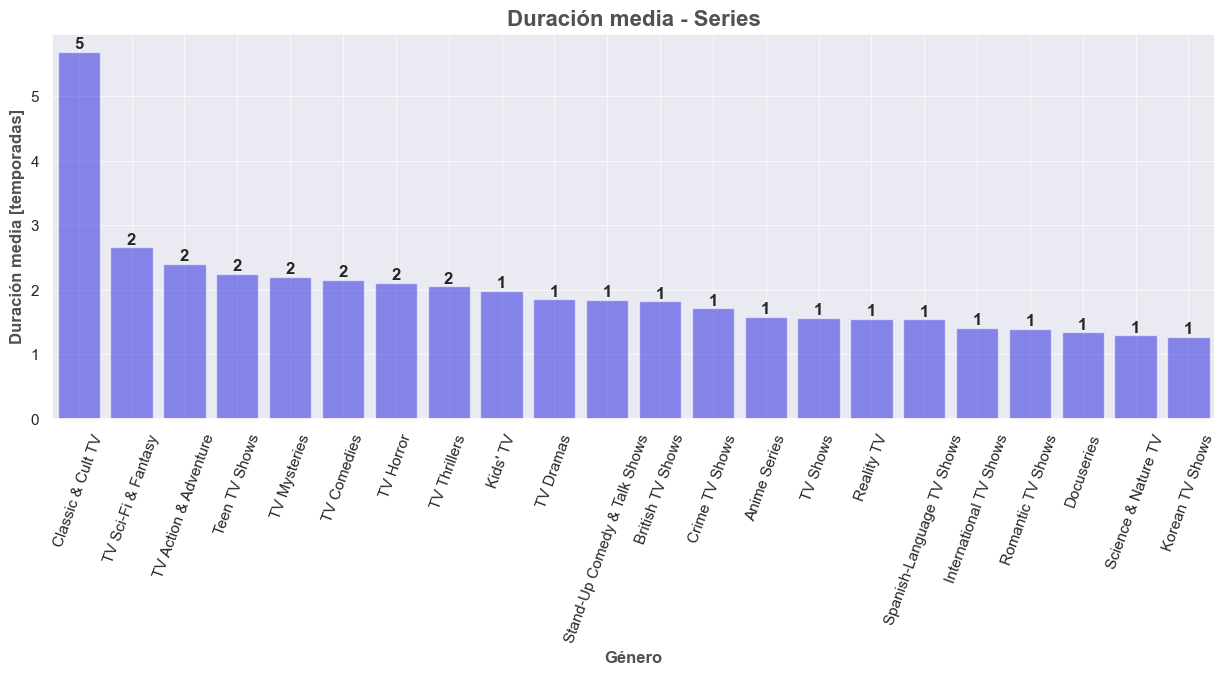

In [572]:
medias = {}
for genre in df_titles:
    df_genre = df[(df['listed_in'].str.contains(genre)) & (df['type'] == 'TV Show')]
    df_genre['duration_int'] = (df_genre['duration_int']).astype(dtype='int', errors='ignore')
    medias[genre] = df_genre['duration_int'].mean()


df_medias = pd.DataFrame.from_dict(medias, orient='index', columns=['Values']).reset_index()
df_medias = df_medias.rename(columns={'index': 'genre', 'Values': 'media'})

fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(data = df_medias.sort_values(by = 'media', inplace = True, ascending = False), x = df_medias.genre, y = df_medias.media, color = 'blue', alpha = 0.5)
ax.grid(lw = 0.5)

for i in range(l):
    plt.text(x=i, y=df_medias.iloc[i]['media'] + 0.05, s=str(math.floor(df_medias.iloc[i]['media'])), ha='center', fontweight = 'bold')

ax.set_xlabel ('Género', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel ('Duración media [temporadas]', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_title ('Duración media - Series', fontsize = 16, fontweight = 'bold', alpha = 0.8)
ax.tick_params (axis='x', rotation = 70)

In [ ]:
# Cantidad de películas y series por release_year
# 

In [582]:
df['country'].isna().sum()
df['country'] = df['country'].fillna('Unknown')
df['country'].isna().sum()

0

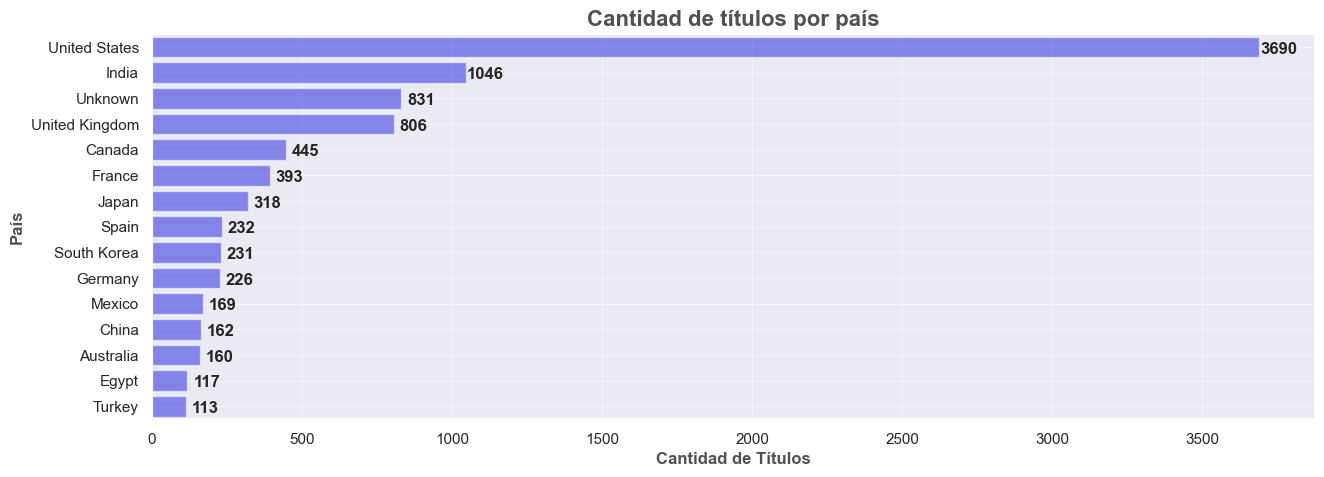

In [628]:
# Títulos
countries = {}
for country in df['country']:
    for i in country.split(','):
        i = i.strip()
        if i not in countries:
            countries[i] =1
        else:
            countries[i] += 1

df_countries = pd.DataFrame(list(countries.items()), columns=['Country', 'Count'])

df_countries = df_countries.sort_values(by='Count', ascending=False).head(15)

fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(data = df_countries, x = 'Count', y = 'Country', color = 'blue', alpha = 0.5, orient='horizontal')
ax.grid(lw = 0.5)

for i in range(len(df_countries)):
    plt.text(y=i+0.25, x=df_countries['Count'].iloc[i] + 65, s=str(df_countries['Count'].iloc[i]), ha='center', fontweight = 'bold')

ax.set_xlabel ('Cantidad de Títulos', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel ('País', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_title ('Cantidad de títulos por país', fontsize = 16, fontweight = 'bold', alpha = 0.8)
ax.grid(lw = 0.4)

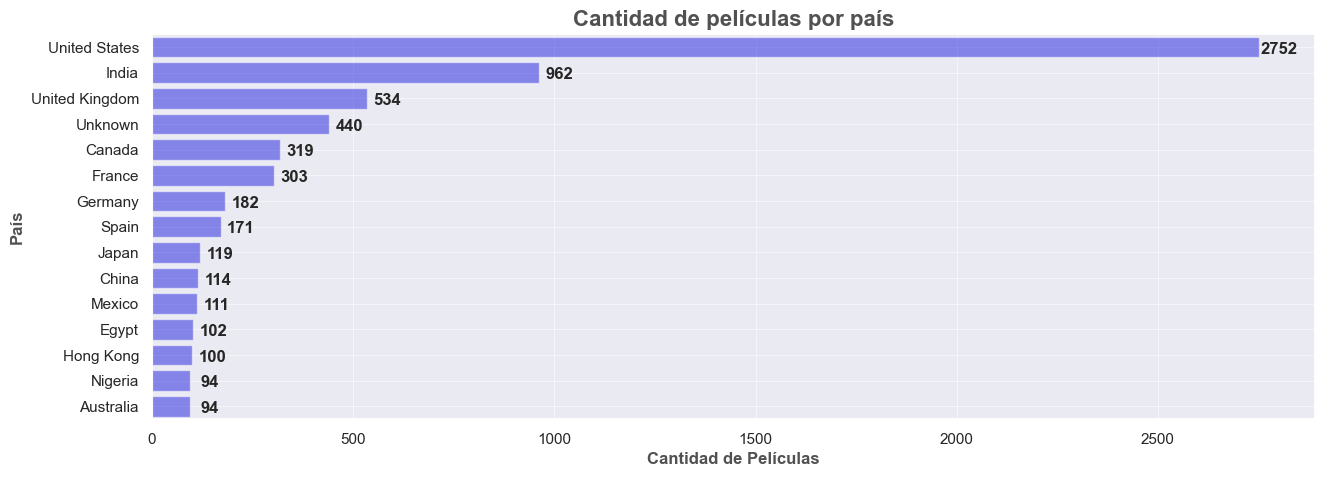

In [619]:
# Países
countries = {}
for country in df[df['type'] == 'Movie']['country']:
    for i in country.split(','):
        i = i.strip()
        if i not in countries:
            countries[i] =1
        else:
            countries[i] += 1

df_countries = pd.DataFrame(list(countries.items()), columns=['Country', 'Count'])

df_countries = df_countries.sort_values(by='Count', ascending=False).head(15)

fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(data = df_countries, x = 'Count', y = 'Country', color = 'blue', alpha = 0.5, orient='horizontal')
ax.grid(lw = 0.5)

for i in range(len(df_countries)):
    plt.text(y=i+0.25, x=df_countries['Count'].iloc[i] + 50, s=str(df_countries['Count'].iloc[i]), ha='center', fontweight = 'bold')

ax.set_xlabel ('Cantidad de Películas', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel ('País', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_title ('Cantidad de películas por país', fontsize = 16, fontweight = 'bold', alpha = 0.8)
ax.grid(lw = 0.4)

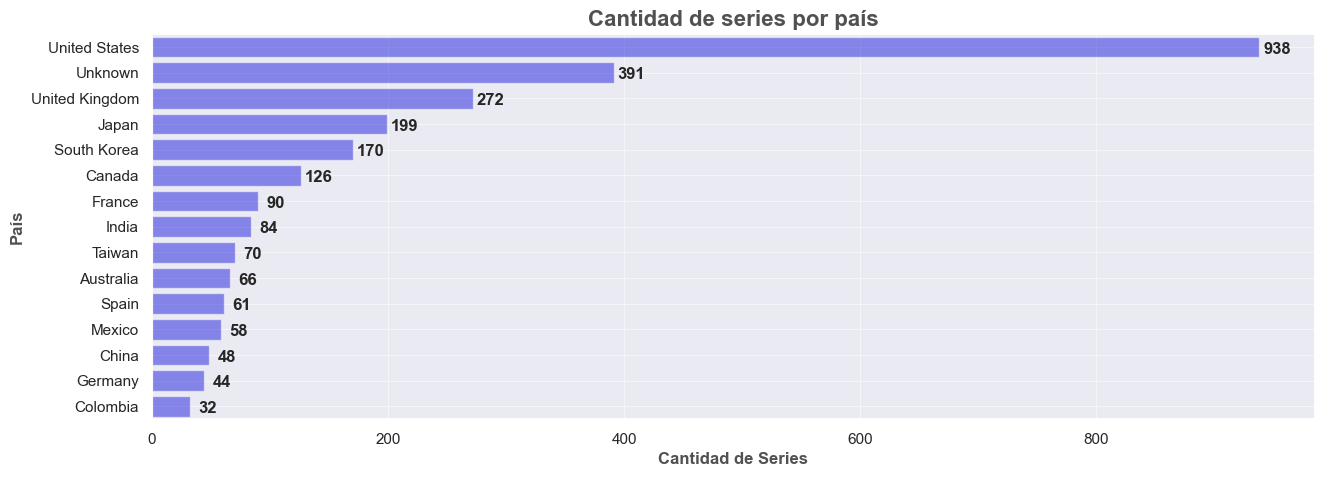

In [623]:
# Series
countries = {}
for country in df[df['type'] == 'TV Show']['country']:
    for i in country.split(','):
        i = i.strip()
        if i not in countries:
            countries[i] =1
        else:
            countries[i] += 1

df_countries = pd.DataFrame(list(countries.items()), columns=['Country', 'Count'])

df_countries = df_countries.sort_values(by='Count', ascending=False).head(15)

fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(data = df_countries, x = 'Count', y = 'Country', color = 'blue', alpha = 0.5, orient='horizontal')
ax.grid(lw = 0.5)

for i in range(len(df_countries)):
    plt.text(y=i+0.25, x=df_countries['Count'].iloc[i] + 15, s=str(df_countries['Count'].iloc[i]), ha='center', fontweight = 'bold')

ax.set_xlabel ('Cantidad de Series', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel ('País', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_title ('Cantidad de series por país', fontsize = 16, fontweight = 'bold', alpha = 0.8)
ax.grid(lw = 0.4)

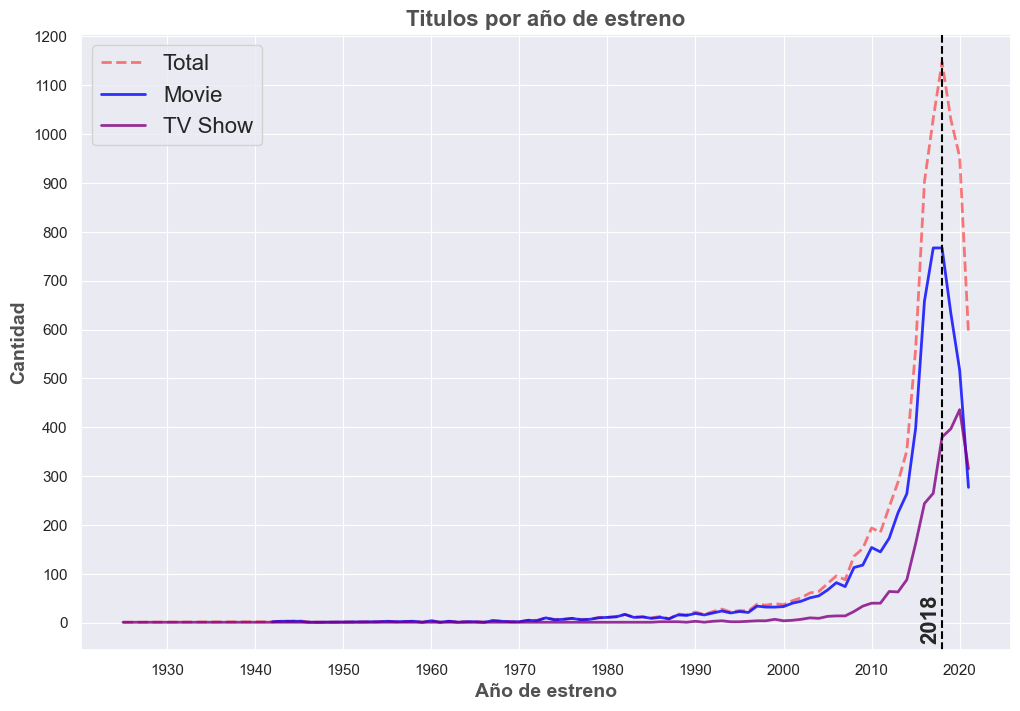

In [807]:
fig,ax = plt.subplots(figsize =(12,8))
colors = ['blue', 'purple']

x = df['release_year'].value_counts().index
y = df['release_year'].value_counts().values
sns.lineplot(x = x, y = y, label = 'Total', color = 'red', alpha = 0.5, linewidth = 2, linestyle = 'dashed')

i = 0
for tipo in df['type'].unique():
    df_type = df[df['type'] == tipo]
    x = df_type['release_year'].value_counts().index
    y = df_type['release_year'].value_counts().values

    sns.lineplot(x = x, y = y, label = tipo, color = colors[i], alpha = 0.8, linewidth = 2)
    i += 1

# Plot year with max total

dict_years = dict(df['release_year'].value_counts())
max_val = df['release_year'].value_counts().max()

for key,val in dict_years.items():
    if val == max_val:
        max_year = key

ax.axvline(x = max_year, color = 'black', ls = '--', lw = 1.5, )
plt.text(x = max_year-2.5, y = -35, s = str(max_year), fontweight = 'bold', rotation = 90, fontsize = 16)


ax.legend(loc = 'upper left', fontsize = 16)
ax.set_xlabel('Año de estreno', fontsize = 14, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel('Cantidad', fontsize = 14, fontweight = 'bold', alpha = 0.8)
ax.set_title('Titulos por año de estreno', fontsize = 16, fontweight = 'bold', alpha = 0.8)
ax.grid(lw = 0.8)
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_major_locator(MultipleLocator(10))